# MTF and Linearity

In [1]:
!python3 --version
import sys
sys.path

Python 3.8.5


['/Users/ajpfahnl/Google Drive/__Kadambi/MTF',
 '/Users/ajpfahnl/.vscode/extensions/ms-toolsai.jupyter-2021.5.702919634/pythonFiles',
 '/Users/ajpfahnl/.vscode/extensions/ms-toolsai.jupyter-2021.5.702919634/pythonFiles/lib/python',
 '/Users/ajpfahnl/miniconda3/envs/MTF/lib/python37.zip',
 '/Users/ajpfahnl/miniconda3/envs/MTF/lib/python3.7',
 '/Users/ajpfahnl/miniconda3/envs/MTF/lib/python3.7/lib-dynload',
 '',
 '/Users/ajpfahnl/.local/lib/python3.7/site-packages',
 '/Users/ajpfahnl/miniconda3/envs/MTF/lib/python3.7/site-packages',
 '/Users/ajpfahnl/miniconda3/envs/MTF/lib/python3.7/site-packages/locket-0.2.1-py3.7.egg',
 '/Users/ajpfahnl/miniconda3/envs/MTF/lib/python3.7/site-packages/IPython/extensions',
 '/Users/ajpfahnl/.ipython']

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import rawpy
import numpy as np
import math
from scipy.fft import fft
from PIL import Image
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import cv2
%matplotlib inline
#plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

%load_ext autoreload
%autoreload 2

from MTF import MTF
from ImgLinearity import ImgLinearity

In [8]:
n=1
img_orig_rainy = cv2.imread(f"../models/images/rainy/{n}_cropped.jpg")
img_orig_clean = cv2.imread(f"../models/images/clean/{n}_cropped.jpg")
img_MPRNet = cv2.imread(f"../models/images/output/MPRNet/{n}_cropped.png")
img_MSPFN = cv2.imread(f"../models/images/output/MSPFN/{n}_cropped.jpg")
img_RCDNet = cv2.imread(f"../models/images/output/RCDNet/{n}_cropped_x2_SR.png")

names = ["Input", "GT", "MPRNet", "MSPFN", "RCDNet"]
images = [img_orig_rainy, img_orig_clean, img_MPRNet, img_MSPFN, img_RCDNet]

save_dir = f"{n}_cropped_analysis"

Input
(287, 309)
1.6263157894736842 pixels per millimeter
36 cycles per quadrant


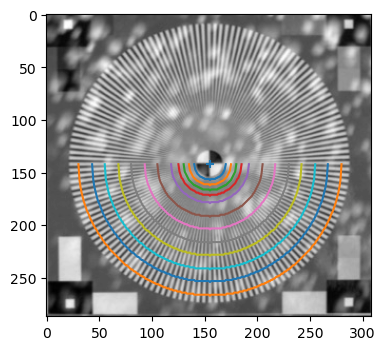

GT
(287, 309)
1.6263157894736842 pixels per millimeter
36 cycles per quadrant


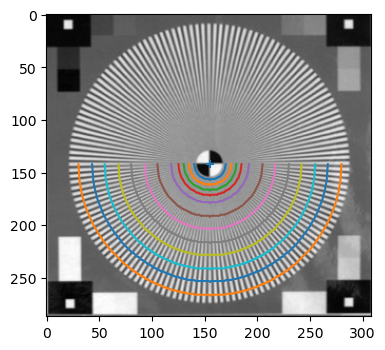

MPRNet
(287, 309)
1.6263157894736842 pixels per millimeter
36 cycles per quadrant


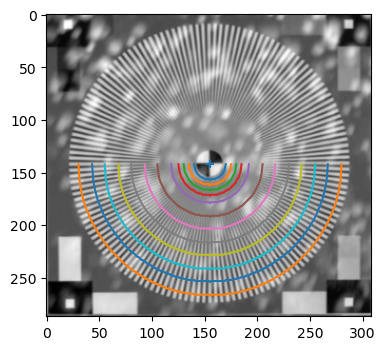

MSPFN
(287, 309)
1.6263157894736842 pixels per millimeter
36 cycles per quadrant


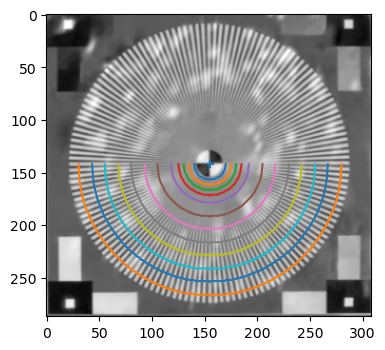

RCDNet
(287, 309)
1.6263157894736842 pixels per millimeter
36 cycles per quadrant


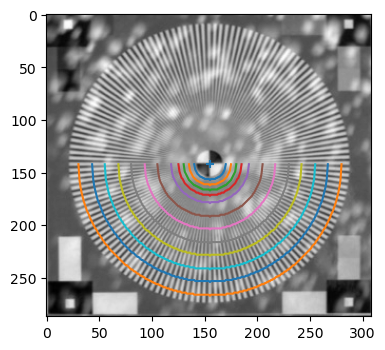

In [9]:
img_MTFs = []
for name, image in zip(names, images):
    print(name)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    if n == 1:
        image = image[8:295, 54:363]; params = ((-1, 1) , 0.5)
    elif n == 2:
        image = image[0:507, 853:1398]; params = ((-1, 1) , 0.9)
    img_MTF = MTF(image, *params)
    img_MTF.find_arcs()
    img_MTF.display_arcs()
    plt.savefig(f'{save_dir}/0_{name}.png')
    plt.show()
    img_MTFs.append(img_MTF)


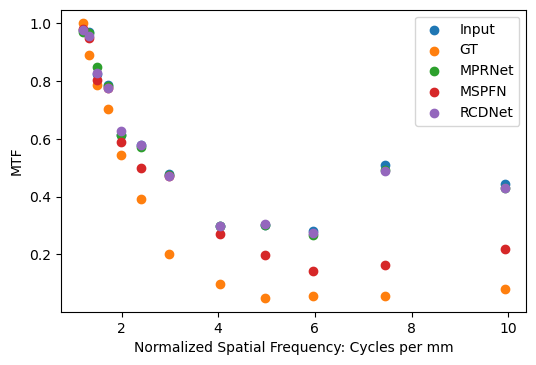

In [11]:
for name, img_MTF in zip(names, img_MTFs):
    if n == 1:
        #mtfs = img_MTF.arcvals_to_mtfs(filt=False, trim=0)
        mtfs = img_MTF.arcvals_to_mtfs_old()
    elif n == 2:
        # mtfs = img_MTF.arcvals_to_mtfs(filt=False, trim=0)
        mtfs = img_MTF.arcvals_to_mtfs_old()
    freqs = img_MTF.freqs
    plt.scatter(freqs, mtfs, label=name)
plt.ylabel("MTF")
plt.xlabel("Normalized Spatial Frequency: Cycles per mm")
plt.legend()
plt.savefig(f'{save_dir}/1_MTFs.png')